<a href="https://colab.research.google.com/github/l-bat/ml/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving datatest.txt to datatest.txt


In [0]:
data = pd.read_csv('datatest.txt')

In [6]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


**Описание данных *Occupancy Detection Data Set*:**

* Дата: год-месяц-день час:минута:секунда
* Температура, в градусах Цельсия
* Относительная влажность, %
* Свет, в Lux
* CO2, в ppm
* Влажность, рассчитывается с использованием температуры и относительной влажности, в kgwater-vapor/kg-air
* Занятость комнаты: {0, 1}, 0 - не занята, 1 - занята


In [0]:
data.shape

(2665, 7)

Выведем названия столбцов

In [0]:
data.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Посмотрим общую характеристику текущего набора

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
date             2665 non-null object
Temperature      2665 non-null float64
Humidity         2665 non-null float64
Light            2665 non-null float64
CO2              2665 non-null float64
HumidityRatio    2665 non-null float64
Occupancy        2665 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [0]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Построим матрицу ковариации

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1553331dd8>,
      dtype=object)

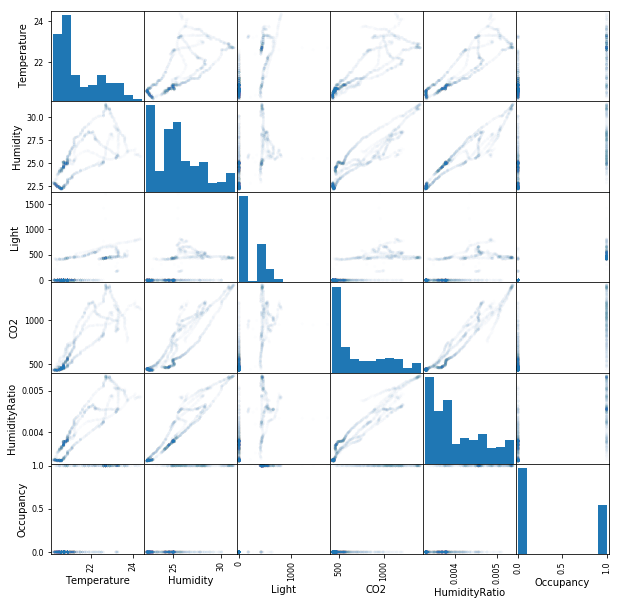

In [0]:
from pandas.plotting import scatter_matrix


scatter_matrix(data, alpha = .01, figsize = (10, 10))

In [0]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


In [0]:
data['Temperature'].unique()

array([23.7       , 23.718     , 23.73      , 23.7225    , 23.754     ,
       23.76      , 23.736     , 23.745     , 23.6       , 23.64      ,
       23.65      , 23.625     , 23.61666667, 23.66666667, 23.575     ,
       23.54      , 23.525     , 23.5       , 23.445     , 23.39      ,
       23.37      , 23.37333333, 23.32333333, 23.365     , 23.29      ,
       23.30666667, 23.272     , 23.2       , 23.23      , 23.215     ,
       23.14      , 23.15      , 23.18      , 23.11666667, 23.1       ,
       23.06      , 23.02      , 23.01      , 23.        , 22.98166667,
       22.945     , 22.956     , 22.9725    , 22.912     , 22.89      ,
       22.865     , 22.87333333, 22.815     , 22.84      , 22.79      ,
       22.772     , 22.76      , 22.7       , 22.7225    , 22.68      ,
       22.64      , 22.6       , 22.66666667, 22.62      , 22.625     ,
       22.65      , 22.56      , 22.58      , 22.575     , 22.55      ,
       22.56666667, 22.525     , 22.54      , 22.5       , 22.52

Разделим имеющиеся столбцы на категориальные и на числовые

In [0]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [0]:
categorical_columns

['date']

In [0]:
numerical_columns

['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']

Найдем пропуски в данных

In [0]:
data[numerical_columns].count(axis = 0)

Temperature      2665
Humidity         2665
Light            2665
CO2              2665
HumidityRatio    2665
Occupancy        2665
dtype: int64

Очень хорошие данные) Пропусков нет

## Векторизация

In [0]:
categorical_columns = pd.get_dummies(data[categorical_columns])

In [0]:
categorical_columns.columns

Index(['date_2015-02-02 14:19:00', 'date_2015-02-02 14:19:59',
       'date_2015-02-02 14:21:00', 'date_2015-02-02 14:22:00',
       'date_2015-02-02 14:23:00', 'date_2015-02-02 14:23:59',
       'date_2015-02-02 14:25:00', 'date_2015-02-02 14:25:59',
       'date_2015-02-02 14:26:59', 'date_2015-02-02 14:28:00',
       ...
       'date_2015-02-04 10:34:00', 'date_2015-02-04 10:34:59',
       'date_2015-02-04 10:36:00', 'date_2015-02-04 10:37:00',
       'date_2015-02-04 10:38:00', 'date_2015-02-04 10:38:59',
       'date_2015-02-04 10:40:00', 'date_2015-02-04 10:40:59',
       'date_2015-02-04 10:41:59', 'date_2015-02-04 10:43:00'],
      dtype='object', length=2665)

В данном случае имеется один категориальный признак - дата. Применять OneHotEncoder к нему не имеет смысла - получим огромное число столбцов, но никак не улучшим качество предсказаний. Лучше сделаем дату индексом нашей таблицы.

In [0]:
data.set_index('date', inplace=True)

## Нормализация количественных признаков

In [0]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


Все признаки количественные, нормализуем всю таблицу

In [0]:
data = (data - data.mean(axis = 0)) / data.std(axis = 0)

In [0]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03,2.665000e+03
mean,3.319024e-13,1.344833e-14,8.348544e-17,1.243950e-16,6.466264e-14,3.324920e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.200241e+00,-1.335309e+00,-7.722587e-01,-9.922262e-01,-1.185274e+00,-7.575707e-01
25%,-7.625076e-01,-8.592828e-01,-7.722587e-01,-8.606840e-01,-8.148558e-01,-7.575707e-01
50%,-5.290501e-01,-1.452440e-01,-7.722587e-01,-4.694740e-01,-3.471171e-01,-7.575707e-01
75%,8.976349e-01,6.166709e-01,9.962493e-01,8.146285e-01,8.263135e-01,1.319514e+00
max,2.893373e+00,2.510857e+00,6.011019e+00,2.338183e+00,2.212265e+00,1.319514e+00


## X и y

In [0]:
X = data.drop(('Occupancy'), axis = 1) # выбрасываем столбец 'Occupancy'
y = data['Occupancy']
feature_names = X.columns

In [0]:
type(feature_names)

pandas.core.indexes.base.Index

In [0]:
feature_names

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

In [0]:
X.shape

(2665, 6)

In [0]:
y.shape

(2665,)

In [0]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [0]:
X_train.shape 


(1865, 6)

In [0]:
X_test.shape 

(800, 6)

## kNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.04611260053619303 0.06875


In [100]:
#Можно посчитать ошибку как 1 - точность, вычисленную через метод score в knn
1 - knn.score(X_test, y_test)

0.06874999999999998

In [101]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))


[[474  36]
 [ 19 271]]


In [102]:
from sklearn.model_selection import GridSearchCV

nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.05844504021447716 15


In [103]:

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)



0.05308310991957105 0.0675


## PCA

Построим график зависимости ошибки на тестовой и обучающей выборках от количества компонент

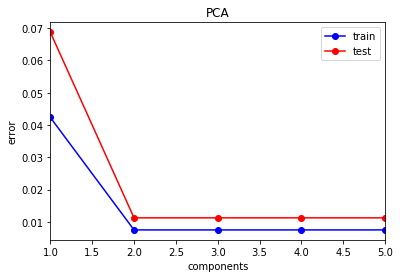

In [104]:
from sklearn.decomposition import PCA


components_arr = np.arange(1, 6)
test_err = []
train_err = []
oob_err = []

for components in components_arr:
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=23)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != knn.predict(X_train)))
    test_err.append(np.mean(y_test  != knn.predict(X_test)))
    

plt.figure()
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
plt.show()

При применении метода главных компонент удалось снизить ошибку по сравнению с первоначальным решением

Найдем минимальную ошибку

In [105]:
np.min(test_err)

0.01125

Найдем индекс оптимального количества главных компонент

In [106]:
np.argmin(test_err)

1

Минимальная ошибка: 0.01125  
Оптимальное количество компонент: 2

**Выводы:** метод главных компонент позволил увеличить точность предсказаний на 0,056 и использовать в 3 раза меньше памяти

## Нейронные сети

Разбиваем данные на обучающую и тестовую выборки

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

Обучаем классификатор

In [0]:
from sklearn.neural_network import MLPClassifier

Обучение классификатора в виде многослойного персептрона. Активационная функция: сигмоида. Один скрытый слой, со 100 нейронами.

In [62]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [64]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0196078431372549 0.022727272727272728


Наблюдаем небольшое переобучение. Попробуем использовать двухслойную полносвязную сеть. 

In [44]:
mlp_model = MLPClassifier(hidden_layer_sizes = (60, 10), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [46]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.020168067226890758 0.022727272727272728


In [0]:
Качество на тренировочной выборке немного ухудшилось, на тестовой осталось без изменений. 

### Подбор гиперпараметров



Подберем оптимальное значение параметра регуляризации alpha

In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

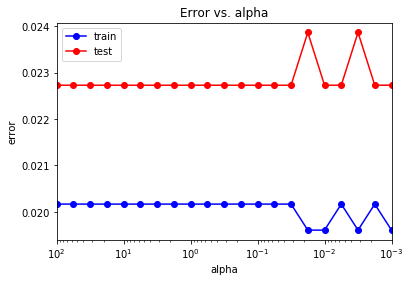

In [67]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Видим, что ошибка на тренировочной выборке минимальна при alpha = 0.01, а на тесторой выборке наоборот. И при любом альфа ошибка на тренировочной выборке меньше, чем ошибка на тестовой. Наблюдаем переобучение.

Подберем оптимальное количество нейронов

In [0]:
nodes_arr = np.arange(10, 100, 5)
test_err = []
train_err = []
for nodes in nodes_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

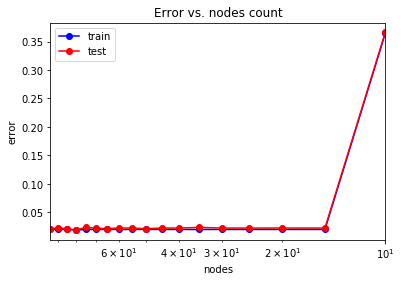

In [70]:
plt.semilogx(nodes_arr_1, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_1, test_err, 'r-o', label = 'test')
plt.xlim([np.max(nodes_arr_1), np.min(nodes_arr_1)])
plt.title('Error vs. nodes count')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()

In [73]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальное значение ошибки на тренировочной и тестовой выборках:", min_train_err, min_test_err)

nodes_opt_1 = nodes_arr_1[test_err == min_test_err][0]
print("Оптимальное значение количества нейронов:", nodes_opt_1)

Минимальное значение ошибки на тренировочной и тестовой выборках: 0.01904761904761905 0.019318181818181818
Оптимальное значение количества нейронов: 80


Ошибка на тренировочной и тестовой выборках ведут себя примерно одинакого, начиная с 15 нейронов. При 80 нейронах достигается лучшее качество - переобучения нет.

## Random forest

In [74]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Считаем среднюю ошибку

In [75]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0125


Построим график зависимости ошибки на обучающей и тестовой выборках,а также out-of-bag ошибки (oob-ошибки) от количества деревьев.

In [0]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

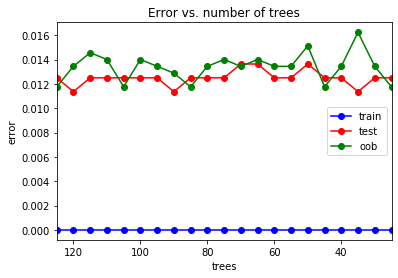

In [77]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()

Переобучение наблюдается при любом количестве деревьев.

In [92]:
trees_opt = trees_arr[test_err == np.min(test_err)]
trees_opt = trees_opt[0]
print("Оптимальное число деревьев:", trees_opt)

Оптимальное число деревьев: 65


In [93]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальное значение ошибки", min_train_err, min_test_err)

Минимальное значение ошибки 0.0 0.011363636363636364


## Gradient Boosted Trees

In [83]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Построим график зависимости ошибки на обучающей и тестовой выборках,а также out-of-bag ошибки (oob-ошибки) от количества деревьев.

In [0]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))



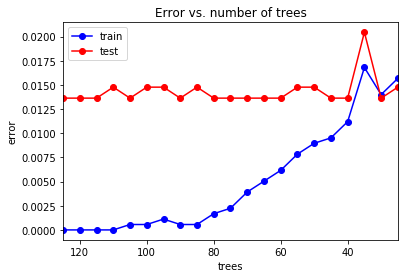

In [95]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()

При небольшом количестве деревьев модель ведет себя не стабильно, при увеличении крличества деревьев ошибка на тренировочной выборке становится нулевой, но на тестовой изменяется слабо. Видно сильное переобучение.

In [96]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальное значение ошибки", min_train_err, min_test_err)

Минимальное значение ошибки 0.0 0.013636363636363636


## Выводы

На текущем наборе данных минимальную ошибку удалось достичь, используя метод k ближайших соседей после применения метода главных компонент. Без уменьшения размерности метод k ближайших соседей давал самую большую ошибку. Сравнимым качеством обладает метод random forest, но при этом видно сильное переобучение. Если использовать полносвязную сеть с одним скрытым слоем, то переобучения почти нет, а качество ниже на 0.006.  
В наборе данных многие признаки слабо информативны и избыточны, поэтому уменьшение числа признаков упростило модель и повысило ее эффективность. 
